In [3]:
import pandas as pd

df = pd.read_excel(r"sales final data.xlsx")

df.head()


,Invoice No,Invoice Date,Contact Name,Product Name,Brand,Category,Qty,Rate,Disc.,Disc %,Tax,Tax %,Total
0,15.0,2024-04-14,Vikas Yadav,OO9229-08 HYDRA BLK INK/PRIZM 24K,Oakely,Accessories,1.0,9737.29,1460.59,15.0,1489.59,18.0,9766.50
1,22.0,2024-04-17,Rahul,FN0415-422 NIKE REFUEL BOTTLE 18 OZ,Nike,Accessories,1.0,624.11,93.62,15.0,63.66,12.0,594.15
2,24.0,2024-04-17,Ravindra,UMPIRE COUNTER,OTHER,Accessories,1.0,196.43,17.68,9.0,21.45,12.0,200.20
3,44.0,2024-04-26,Rahul,SX7667-010 NIKE SOCKS PACK OF 3 BLK SIZE L,Nike,Accessories,1.0,566.57,141.67,25.0,21.25,5.0,446.25
4,53.0,2024-04-27,Mahendra Pratap Shukla,SOCKS - PRO SUPER,OTHER,Accessories,1.0,276.19,13.81,5.0,13.12,5.0,275.50


In [4]:
#  Invoice Date to datetime
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'], dayfirst=True)

# numeric columns
numeric_cols = ['Qty', 'Rate', 'Disc.', 'Disc %', 'Tax', 'Tax %', 'Total']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2395 entries, 0 to 2394
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Invoice No    2394 non-null   float64       
 1   Invoice Date  2395 non-null   datetime64[ns]
 2   Contact Name  2395 non-null   object        
 3   Product Name  2395 non-null   object        
 4   Brand         2395 non-null   object        
 5   Category      2395 non-null   object        
 6   Qty           2387 non-null   float64       
 7   Rate          2395 non-null   float64       
 8   Disc.         2393 non-null   float64       
 9   Disc %        2395 non-null   float64       
 10  Tax           2395 non-null   float64       
 11  Tax %         2394 non-null   float64       
 12  Total         2395 non-null   float64       
dtypes: datetime64[ns](1), float64(8), object(4)
memory usage: 243.4+ KB


In [5]:
# unique brands and catgeoruies
num_brands = df['Brand'].nunique()
num_categories = df['Category'].nunique()

print(f"Number of distinct brands: {num_brands}")
print(f"Number of distinct categories: {num_categories}")

print("\nUnique Brands:")
print(df['Brand'].unique())

print("\nUnique Categories:")
print(df['Category'].unique())


Number of distinct brands: 46
Number of distinct categories: 12

Unique Brands:
['Oakely' 'Nike' 'OTHER' 'Lenskart' 'SS' 'Yonex' 'COSCO' 'NIVIA' 'VB'
 'Pioneer' 'PARX' 'Prima' 'Shiv Naresh' 'TYKA' 'SHREY' 'FORMA' 'SG'
 'MOONWALKR' 'PUMA' 'GRAVITY' 'KW' 'DSC' 'SKY' 'VIXEN' 'AJ' 'GN' 'MARUTI'
 'SF' 'VOVES' 'SEGA' 'FORVO' 'GM' 'ASICS' 'ADIDAS' 'NB' 'CAMPUS'
 'CHROMOZOME' 'CELLO' 'BSC' 'BELLAVITA' 'FOGG' 'CEAT' 'ELEMNT'
 'CAP RANGER' 'Services' 'BADBOLAT']

Unique Categories:
['Accessories' 'Badminton' 'Basketball' 'Clothes' 'Courier' 'Cricket'
 'Football' 'Footwear' 'Others' 'Services' 'Tennis' 'Volleyball']


In [6]:
# Itop 10 brands in sales
top_brands = df.groupby("Brand")['Total'].sum().nlargest(10).index.tolist()

# only top 10
df_top = df[df['Brand'].isin(top_brands)]


Top 10 Brand-wise Sales (₹):


Brand
SG           1208487.72
SS           1172046.02
DSC           370354.18
SHREY         286784.37
TYKA          192838.50
MOONWALKR     146006.48
Nike          144731.15
GN            134439.68
ASICS         129299.30
Oakely        122663.80
Name: Total, dtype: float64

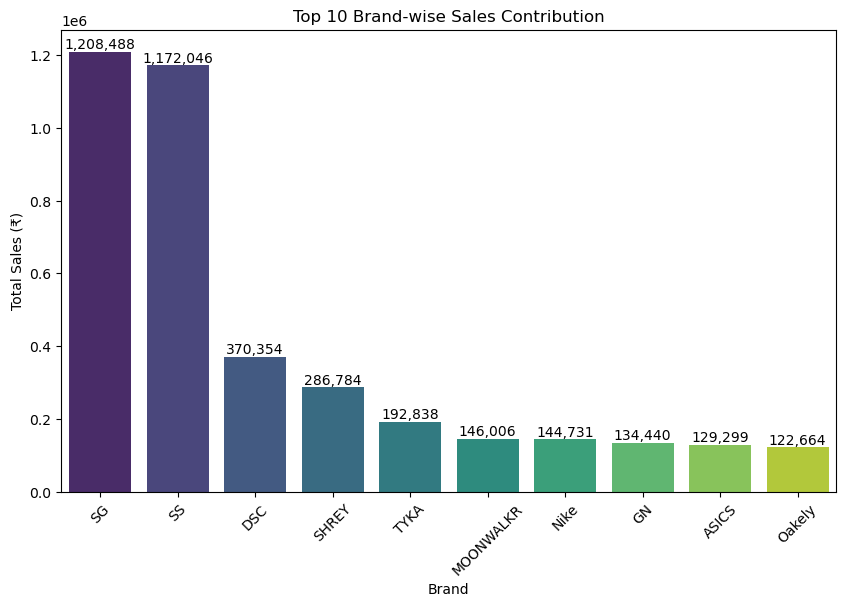

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

brand_sales = df_top.groupby("Brand")['Total'].sum().sort_values(ascending=False)


print("Top 10 Brand-wise Sales (₹):")
display(brand_sales)


plt.figure(figsize=(10,6))
ax = sns.barplot(x=brand_sales.index, y=brand_sales.values, palette="viridis")
plt.xticks(rotation=45)
plt.title("Top 10 Brand-wise Sales Contribution")
plt.ylabel("Total Sales (₹)")
plt.xlabel("Brand")


for p in ax.patches:
    ax.annotate(f"{p.get_height():,.0f}", 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black')
plt.show()


Top 10 Brand-wise Quantity Sold:


Brand
SS           731.0
SG           454.0
TYKA         231.0
SHREY        175.0
DSC          136.0
MOONWALKR     73.0
Nike          57.0
GN            26.0
ASICS         21.0
Oakely        14.0
Name: Qty, dtype: float64

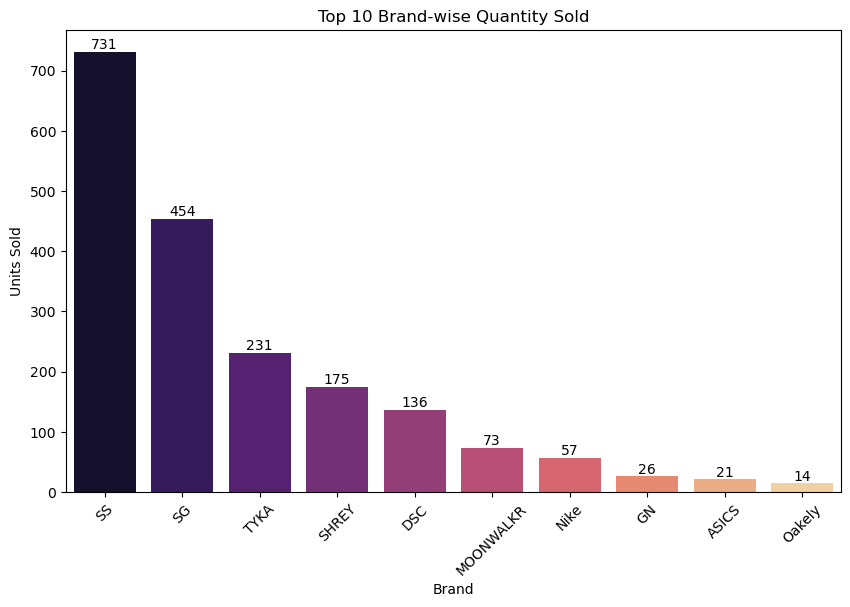

In [8]:
brand_qty = df_top.groupby("Brand")['Qty'].sum().sort_values(ascending=False)

print("Top 10 Brand-wise Quantity Sold:")
display(brand_qty)

plt.figure(figsize=(10,6))
ax = sns.barplot(x=brand_qty.index, y=brand_qty.values, palette="magma")
plt.xticks(rotation=45)
plt.title("Top 10 Brand-wise Quantity Sold")
plt.ylabel("Units Sold")
plt.xlabel("Brand")

for p in ax.patches:
    ax.annotate(f"{p.get_height():,.0f}", 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black')
plt.show()


Top 10 Brand-wise Average Selling Price (₹):


Brand
ASICS        6157.109524
DSC          2723.192500
GN           5170.756923
MOONWALKR    2000.088767
Nike         2539.142982
Oakely       8761.700000
SG           2661.867225
SHREY        1638.767829
SS           1603.346129
TYKA          834.798701
dtype: float64

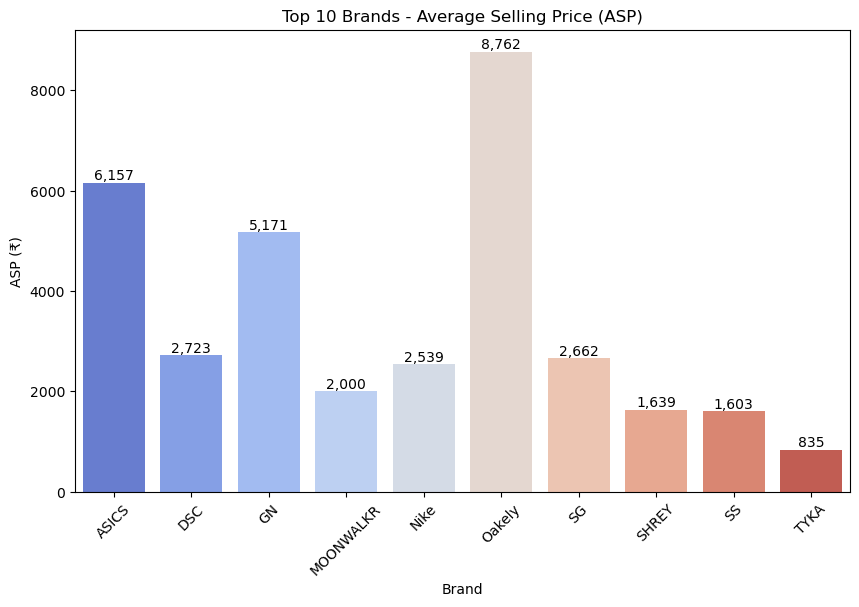

In [9]:
brand_asp = df_top.groupby("Brand").apply(lambda x: x['Total'].sum() / x['Qty'].sum())

print("Top 10 Brand-wise Average Selling Price (₹):")
display(brand_asp)

plt.figure(figsize=(10,6))
ax = sns.barplot(x=brand_asp.index, y=brand_asp.values, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Top 10 Brands - Average Selling Price (ASP)")
plt.ylabel("ASP (₹)")
plt.xlabel("Brand")

for p in ax.patches:
    ax.annotate(f"{p.get_height():,.0f}", 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black')
plt.show()


Brand-Wise Average Order Size:


,Brand,Avg_Order_Value,Avg_Order_Qty
7,CAP RANGER,63000.000000,300.000000
17,GM,9647.250000,1.000000
28,Oakely,8761.700000,1.000000
0,ADIDAS,7792.500909,1.000000
24,NB,6365.190000,1.000000
2,ASICS,6157.109524,1.000000
18,GN,5170.756923,1.000000
30,PUMA,3754.330000,1.000000
12,DSC,3366.856182,1.236364
35,SG,3130.797202,1.185379


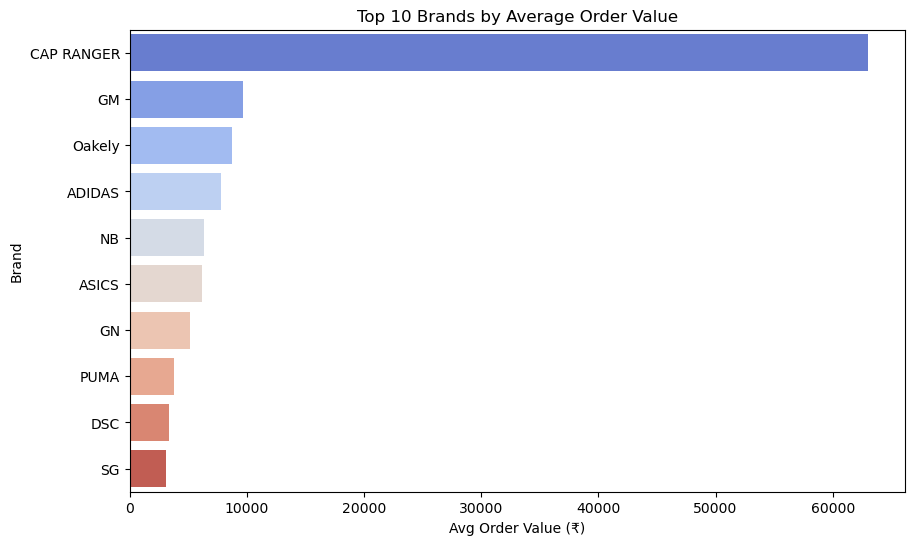

In [10]:
brand_aos = df.groupby('Brand').agg(
    Avg_Order_Value=('Total','mean'),
    Avg_Order_Qty=('Qty','mean')
).reset_index().sort_values('Avg_Order_Value', ascending=False)

print("Brand-Wise Average Order Size:")
display(brand_aos.head(10)) 

plt.figure(figsize=(10,6))
sns.barplot(data=brand_aos.head(10), x='Avg_Order_Value', y='Brand', palette="coolwarm")
plt.title("Top 10 Brands by Average Order Value")
plt.xlabel("Avg Order Value (₹)")
plt.show()

Top 10 Brand-wise Discount Summary:


,Disc.,Disc %
Brand,,
SS,623646.190,16.285615
SG,451672.021,18.933394
DSC,98644.040,18.631727
SHREY,52107.100,13.488982
Nike,34956.890,22.783333
GN,33228.900,19.355769
MOONWALKR,32932.330,19.224306
TYKA,29413.085,13.174641
ASICS,29407.390,21.368095


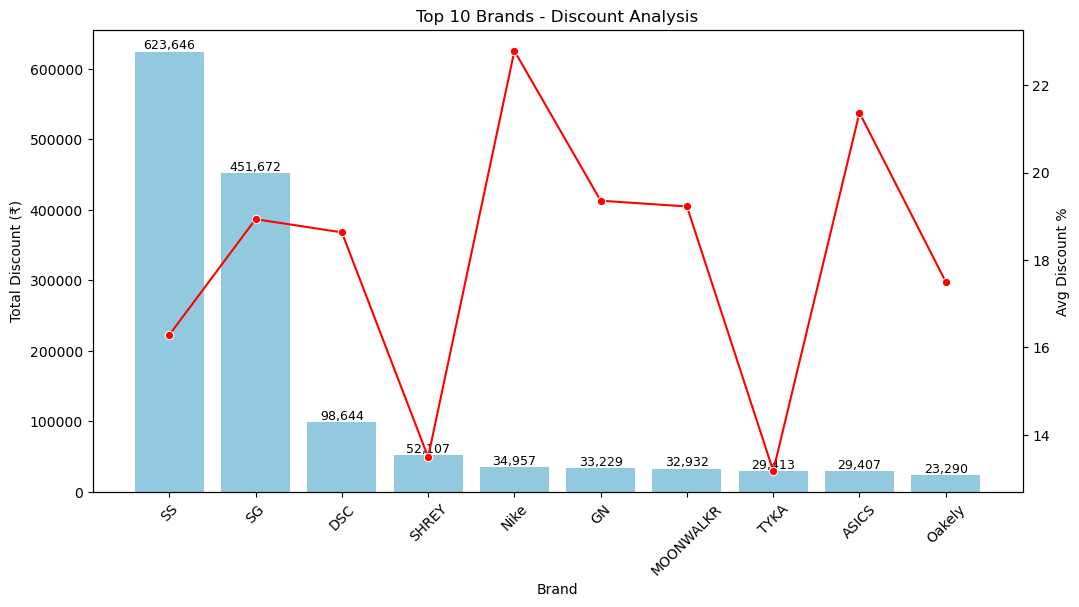

In [11]:
brand_discount = df_top.groupby("Brand").agg({
    'Disc.':'sum',
    'Disc %':'mean'
}).sort_values('Disc.', ascending=False)

print("Top 10 Brand-wise Discount Summary:")
display(brand_discount)

fig, ax1 = plt.subplots(figsize=(12,6))

ax = sns.barplot(x=brand_discount.index, y=brand_discount['Disc.'], ax=ax1, color="skyblue")
ax1.set_ylabel("Total Discount (₹)")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)


for p in ax.patches:
    ax.annotate(f"{p.get_height():,.0f}", 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=9, color='black')

ax2 = ax1.twinx()
sns.lineplot(x=brand_discount.index, y=brand_discount['Disc %'], ax=ax2, color="red", marker="o")
ax2.set_ylabel("Avg Discount %")

plt.title("Top 10 Brands - Discount Analysis")
plt.show()


Monthly Sales Trend (Top 10 Brands):


Brand,ASICS,DSC,GN,MOONWALKR,Nike,Oakely,SG,SHREY,SS,TYKA
Month,,,,,,,,,,
2024-04,4549.35,19199.07,0.00,0.00,21865.40,9766.5,17678.08,0.00,3102.55,0.00
2024-05,17597.60,5969.17,0.00,12050.15,15522.53,7191.0,106521.05,52303.39,77471.55,13239.51
2024-06,0.00,10494.23,9518.30,4822.56,30849.05,6623.1,88436.70,18005.48,84774.22,15735.47
2024-07,16447.65,39571.48,0.00,9744.85,19928.46,0.0,117157.33,40407.88,86299.71,24720.86
2024-08,22367.67,117602.48,20800.00,9456.13,9631.33,8916.5,228247.75,28121.81,209495.83,12695.80
2024-09,36190.18,37907.34,0.00,30239.84,17136.23,0.0,87471.02,17762.77,162953.93,18662.75
2024-10,0.00,49293.57,28878.72,18696.15,11227.11,36686.4,102846.32,21580.20,134469.91,31064.69
2024-11,0.00,22351.43,17478.40,21405.26,14339.94,19335.0,192993.30,45304.51,192706.12,38233.13
2024-12,16798.40,61296.71,36975.86,29769.84,3761.10,24953.3,181292.28,50606.68,178465.85,22008.74


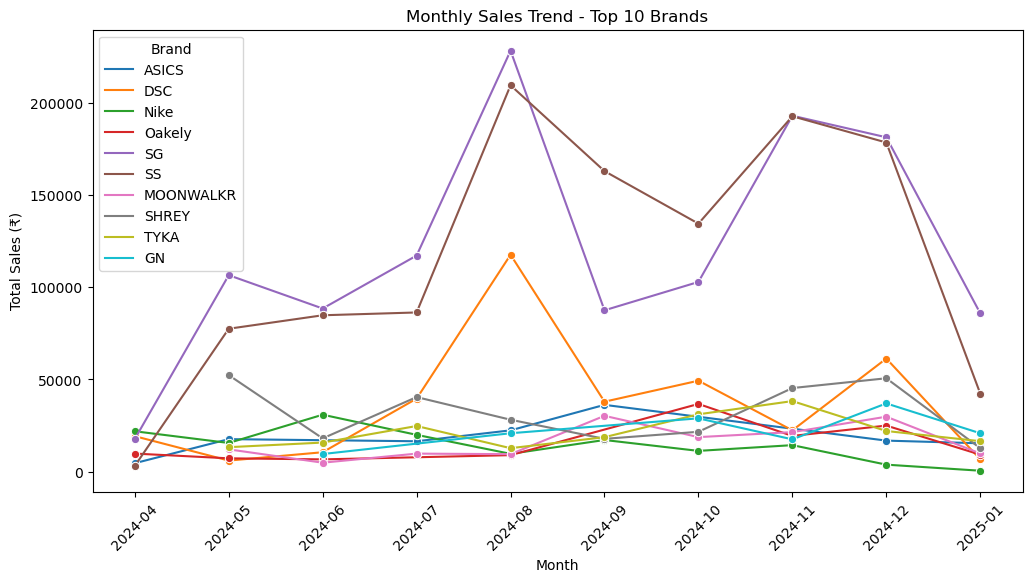

In [12]:
# copy of the month column
df_top = df[df['Brand'].isin(top_brands)].copy()
df_top.loc[:, 'Month'] = df_top['Invoice Date'].dt.to_period('M')

# Group monthly sales
monthly_sales = df_top.groupby(['Month','Brand'])['Total'].sum().reset_index()

# Converting Month from periods to Str for plotting
monthly_sales['Month'] = monthly_sales['Month'].astype(str)


print("Monthly Sales Trend (Top 10 Brands):")
display(monthly_sales.pivot(index='Month', columns='Brand', values='Total').fillna(0))

plt.figure(figsize=(12,6))
sns.lineplot(x="Month", y="Total", hue="Brand", data=monthly_sales, marker="o")
plt.title("Monthly Sales Trend - Top 10 Brands")
plt.ylabel("Total Sales (₹)")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.show()


In [13]:
brand_sales = df.groupby("Brand")['Total'].sum().reset_index().sort_values(by="Total", ascending=False)
print("Brand-wise Total Revenue:")
display(brand_sales)


Brand-wise Total Revenue:


,Brand,Total
35,SG,1208487.72
38,SS,1172046.02
12,DSC,370354.18
36,SHREY,286784.37
41,TYKA,192838.50
23,MOONWALKR,146006.48
26,Nike,144731.15
18,GN,134439.68
2,ASICS,129299.30
28,Oakely,122663.80


# CATEGORY WISE ANALYSIS

In [22]:
category_sales = df.groupby('Category')['Total'].sum().reset_index().sort_values('Total', ascending=False)


print("Category Contribution to Total Sales:")
display(category_sales)

sales_df = pd.read_excel(r"sales final data.xlsx")
inventory_df = pd.read_excel(r"inventory_with_category.xlsx")

Category Contribution to Total Sales:


,Category,Total
5,CRICKET,2700327.10
8,OTHERS,689154.88
3,CLOTHES,590116.00
7,FOOTWEAR,507038.02
1,BADMINTON,113890.30
9,SERVICES,71925.44
10,TENNIS,52760.30
0,ACCESSORIES,51575.30
6,FOOTBALL,14575.70
2,BASKETBALL,7098.60


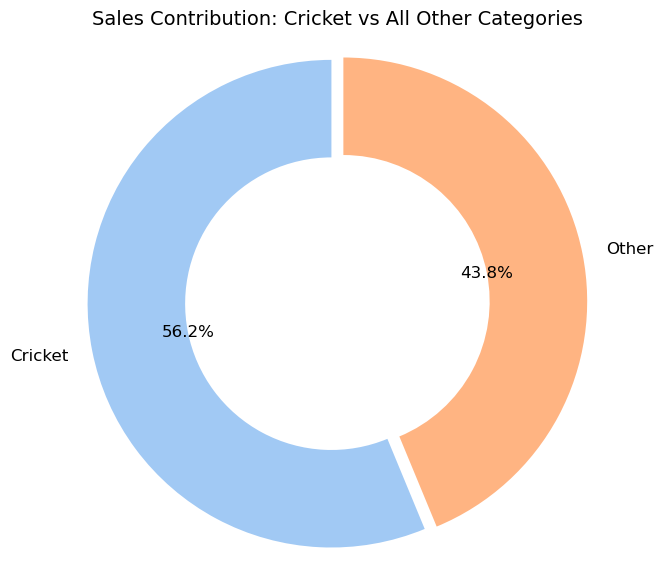

In [23]:
# Standardize categories
sales_df['Category'] = sales_df['Category'].str.strip().str.upper()
inventory_df['Category'] = inventory_df['Category'].str.strip().str.upper()

# Create flag for cricket
sales_df['Cricket_Flag'] = sales_df['Category'].apply(lambda x: 'Cricket' if x == 'CRICKET' else 'Other')
inventory_df['Cricket_Flag'] = inventory_df['Category'].apply(lambda x: 'Cricket' if x == 'CRICKET' else 'Other')

# Sales summmary
cricket_sales = sales_df.groupby('Cricket_Flag')['Total'].sum().reset_index()
cricket_sales.rename(columns={'Total':'Total_Sales'}, inplace=True)
cricket_sales['Sales_Percent'] = (cricket_sales['Total_Sales'] / cricket_sales['Total_Sales'].sum()) * 100

# Inventory summaryy
cricket_stock = inventory_df.groupby('Cricket_Flag')['Recalculated_Stock_Value'].sum().reset_index()
cricket_stock.rename(columns={'Recalculated_Stock_Value':'Stock_Value'}, inplace=True)
cricket_stock['Stock_Percent'] = (cricket_stock['Stock_Value'] / cricket_stock['Stock_Value'].sum()) * 100

# Merge both of them
cricket_analysis = cricket_sales.merge(cricket_stock, left_on='Cricket_Flag', right_on='Cricket_Flag')
cricket_analysis

import matplotlib.pyplot as plt
import seaborn as sns

# Standardize categories
sales_df['Category'] = sales_df['Category'].str.strip().str.upper()

# flag cricket vs others
sales_df['Cricket_Flag'] = sales_df['Category'].apply(lambda x: 'Cricket' if x == 'CRICKET' else 'Other')

# Aggregate total sales using groupBY
cricket_sales = sales_df.groupby('Cricket_Flag')['Total'].sum().reset_index()
cricket_sales.rename(columns={'Total':'Total_Sales'}, inplace=True)

# Donut style pie chart
colors = sns.color_palette('pastel')[:len(cricket_sales)]
explode = [0.05 if cricket_sales.loc[i,'Total_Sales']==cricket_sales['Total_Sales'].max() else 0 
           for i in range(len(cricket_sales))]

plt.figure(figsize=(7,7))
plt.pie(
    cricket_sales['Total_Sales'],
    labels=cricket_sales['Cricket_Flag'],
    autopct='%1.1f%%',
    startangle=90,
    explode=explode,
    colors=colors,
    wedgeprops=dict(width=0.4),
    textprops={'fontsize':12}
)

plt.title("Sales Contribution: Cricket vs All Other Categories", fontsize=14)
plt.axis('equal')
plt.show()



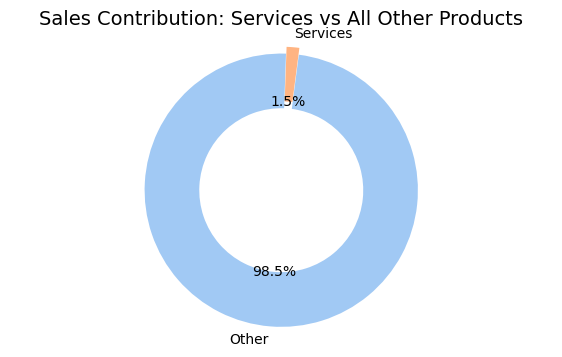

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Standardize categories
sales_df['Category'] = sales_df['Category'].str.strip().str.upper()

# flag service vs others
sales_df['Services_Flag'] = sales_df['Category'].apply(lambda x: 'Services' if x == 'SERVICES' else 'Other')

# Aggregate total sales
services_sales = sales_df.groupby('Services_Flag')['Total'].sum().reset_index()
services_sales.rename(columns={'Total':'Total_Sales'}, inplace=True)

# Donutstyle pie chart
colors = sns.color_palette('pastel')[:len(services_sales)]
explode = [0.05 if services_sales.loc[i,'Total_Sales']==services_sales['Total_Sales'].max() else 0 
           for i in range(len(services_sales))]

plt.figure(figsize=(7,4))
plt.pie(
    services_sales['Total_Sales'],
    labels=services_sales['Services_Flag'],
    autopct='%1.1f%%',
    startangle=88,
    explode=explode,
    colors=colors,
    wedgeprops=dict(width=0.4),
    textprops={'fontsize':10}
)

plt.title("Sales Contribution: Services vs All Other Products", fontsize=14)
plt.axis('equal')
plt.show()


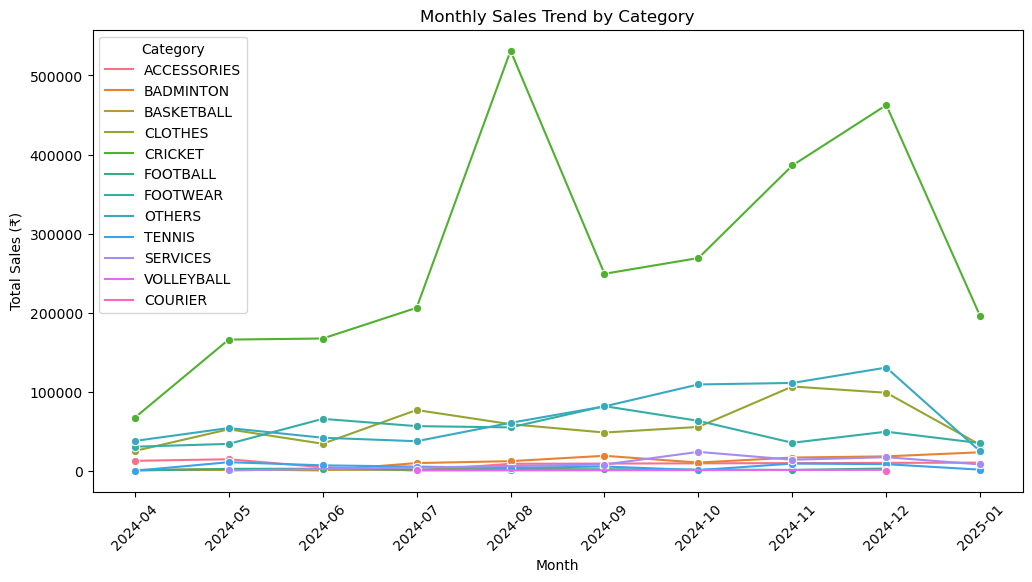

Category,ACCESSORIES,BADMINTON,BASKETBALL,CLOTHES,COURIER,CRICKET,FOOTBALL,FOOTWEAR,OTHERS,SERVICES,TENNIS,VOLLEYBALL
Month,,,,,,,,,,,,
2024-04,12682.6,1059.40,1100.0,25121.60,0.0,67246.56,416.0,30537.85,37838.15,0.00,165.98,0.0
2024-05,14657.2,2111.71,0.0,52577.36,0.0,165989.39,2526.0,34113.95,54141.35,500.00,10937.30,0.0
2024-06,4588.0,475.00,0.0,34261.72,0.0,167334.75,2686.0,65757.25,41877.13,0.00,6971.81,0.0
2024-07,339.0,9847.20,1338.0,76938.30,0.0,206198.03,1594.1,56544.95,37467.66,0.00,5365.28,476.0
2024-08,8916.5,12251.14,3725.6,58996.12,0.0,531240.70,1224.0,54956.14,60717.71,0.00,3766.38,0.0
2024-09,0.0,19047.96,935.0,48457.69,0.0,249199.71,2026.0,81801.76,81529.93,8000.00,5515.27,0.0
2024-10,0.0,10463.72,0.0,55530.24,0.0,269109.37,0.0,63241.50,109246.41,24005.44,902.39,0.0
2024-11,0.0,16817.48,0.0,106635.52,0.0,386167.24,1188.0,35510.25,111157.51,14050.00,9188.55,0.0
2024-12,0.0,18330.98,0.0,98767.19,400.0,462467.22,2915.6,49525.32,130575.14,17270.00,8462.34,1250.0


In [25]:
df['Month'] = df['Invoice Date'].dt.to_period('M')
category_trend = df.groupby(['Month','Category'])['Total'].sum().reset_index()
category_trend['Month'] = category_trend['Month'].astype(str)

plt.figure(figsize=(12,6))
sns.lineplot(data=category_trend, x='Month', y='Total', hue='Category', marker="o")
plt.title("Monthly Sales Trend by Category")
plt.ylabel("Total Sales (₹)")
plt.xticks(rotation=45)
plt.show()


display(category_trend.pivot(index='Month', columns='Category', values='Total').fillna(0))


In [26]:
top_brands_per_cat = (
    df.groupby(['Category','Brand'])['Total'].sum()
    .reset_index()
    .sort_values(['Category','Total'], ascending=[True, False])
    .groupby('Category')
    .head(3)
)

print("Top 3 Brands in Each Category:")
display(top_brands_per_cat)


Top 3 Brands in Each Category:


,Category,Brand,Total
3,ACCESSORIES,Oakely,35066.00
0,ACCESSORIES,Lenskart,12100.00
4,ACCESSORIES,SS,2515.20
7,BADMINTON,Yonex,105170.32
6,BADMINTON,COSCO,8719.98
8,BASKETBALL,COSCO,4381.00
9,BASKETBALL,NIVIA,2717.60
20,CLOTHES,SHREY,235771.11
23,CLOTHES,TYKA,189390.07
22,CLOTHES,Shiv Naresh,74017.07


Category-Wise Discount Analysis:


,Category,Avg_Discount_Percentage,Total_Discount,Total_Sales
0,ACCESSORIES,28.178571,12041.420,51575.30
5,CRICKET,21.232474,1030008.261,2700327.10
1,BADMINTON,19.302234,36581.330,113890.30
11,VOLLEYBALL,19.000000,408.370,1726.00
7,FOOTWEAR,17.371893,118521.840,507038.02
8,OTHERS,15.112765,148532.610,689154.88
3,CLOTHES,14.827162,290851.195,590116.00
10,TENNIS,14.110779,10664.610,52760.30
2,BASKETBALL,14.000000,1054.820,7098.60
6,FOOTBALL,12.361111,1737.040,14575.70


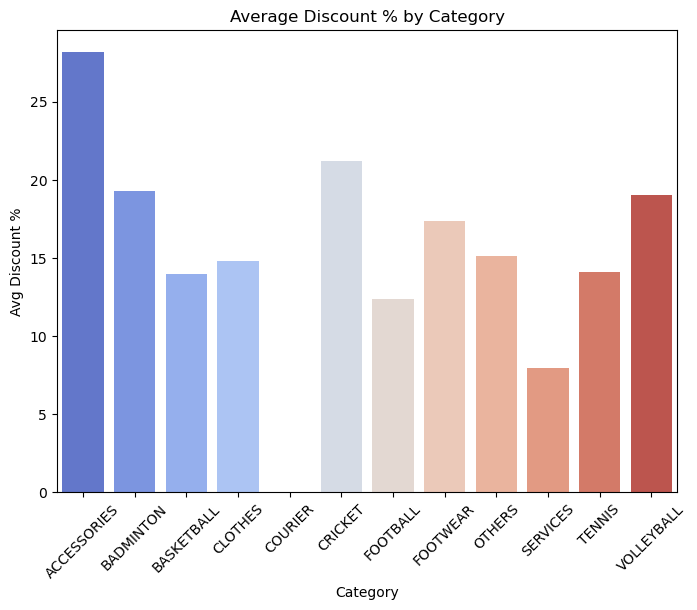

In [28]:
category_discount = df.groupby('Category').agg(
    Avg_Discount_Percentage=('Disc %','mean'),
    Total_Discount=('Disc.','sum'),
    Total_Sales=('Total','sum')
).reset_index()

print("Category-Wise Discount Analysis:")
display(category_discount.sort_values('Avg_Discount_Percentage', ascending=False))

plt.figure(figsize=(8,6))
sns.barplot(data=category_discount, x='Category', y='Avg_Discount_Percentage', palette="coolwarm")
plt.title("Average Discount % by Category")
plt.ylabel("Avg Discount %")
plt.xticks(rotation=45)
plt.show()


Top 10 Categories by Quantity Sold:


,Category,Qty
5,CRICKET,1212.0
8,OTHERS,813.0
3,CLOTHES,590.0
1,BADMINTON,433.0
7,FOOTWEAR,261.0
10,TENNIS,179.0
9,SERVICES,120.0
0,ACCESSORIES,28.0
6,FOOTBALL,18.0
2,BASKETBALL,7.0


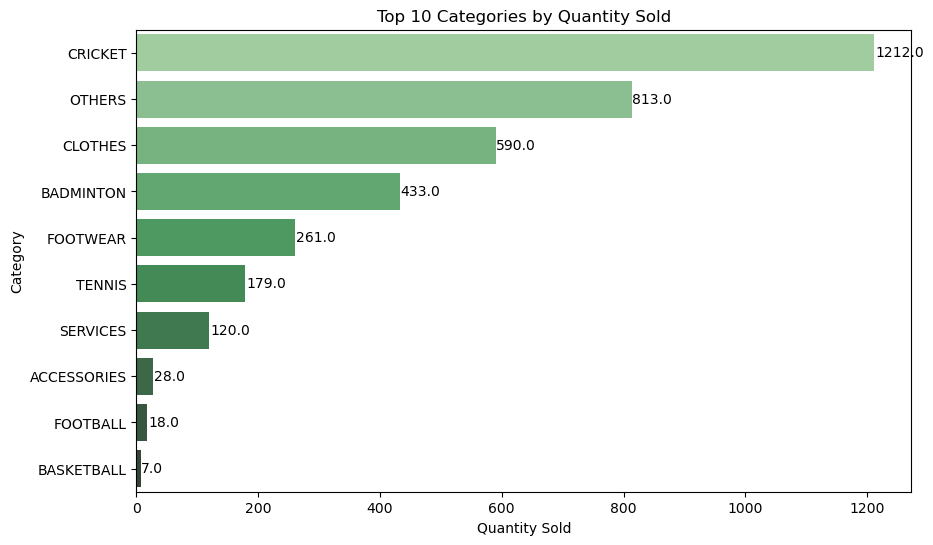

In [30]:
top10_qty = (
    df.groupby('Category')['Qty']
    .sum()
    .reset_index()
    .sort_values('Qty', ascending=False)
    .head(10)
)

print("Top 10 Categories by Quantity Sold:")
display(top10_qty)

plt.figure(figsize=(10,6))
sns.barplot(data=top10_qty, x='Qty', y='Category', palette="Greens_d")
plt.title("Top 10 Categories by Quantity Sold")
plt.xlabel("Quantity Sold")
plt.ylabel("Category")

# Annotate values
for i, v in enumerate(top10_qty['Qty']):
    plt.text(v + 1, i, str(v), va='center')

plt.show()


Top 10 Categories by Revenue:


,Category,Total
5,CRICKET,2700327.10
8,OTHERS,689154.88
3,CLOTHES,590116.00
7,FOOTWEAR,507038.02
1,BADMINTON,113890.30
9,SERVICES,71925.44
10,TENNIS,52760.30
0,ACCESSORIES,51575.30
6,FOOTBALL,14575.70
2,BASKETBALL,7098.60


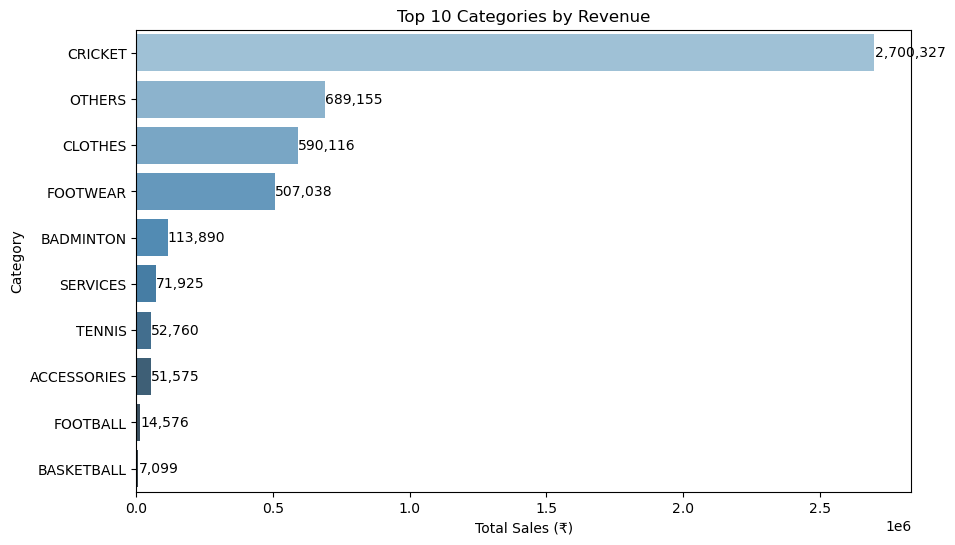

In [31]:
top10_revenue = (
    df.groupby('Category')['Total']
    .sum()
    .reset_index()
    .sort_values('Total', ascending=False)
    .head(10)
)

print("Top 10 Categories by Revenue:")
display(top10_revenue)

plt.figure(figsize=(10,6))
sns.barplot(data=top10_revenue, x='Total', y='Category', palette="Blues_d")
plt.title("Top 10 Categories by Revenue")
plt.xlabel("Total Sales (₹)")
plt.ylabel("Category")


for i, v in enumerate(top10_revenue['Total']):
    plt.text(v + 1000, i, f"{v:,.0f}", va='center')

plt.show()


Category-Wise Average Order Size:


,Category,Avg_Order_Value,Avg_Order_Qty
0,ACCESSORIES,1841.975000,1.000000
1,BADMINTON,1211.598936,4.606383
2,BASKETBALL,1014.085714,1.000000
3,CLOTHES,1154.825832,1.159136
4,COURIER,400.000000,1.000000
5,CRICKET,3165.682415,1.430933
6,FOOTBALL,809.761111,1.000000
7,FOOTWEAR,2086.576214,1.074074
8,OTHERS,1488.455464,1.755940
9,SERVICES,733.933061,1.224490


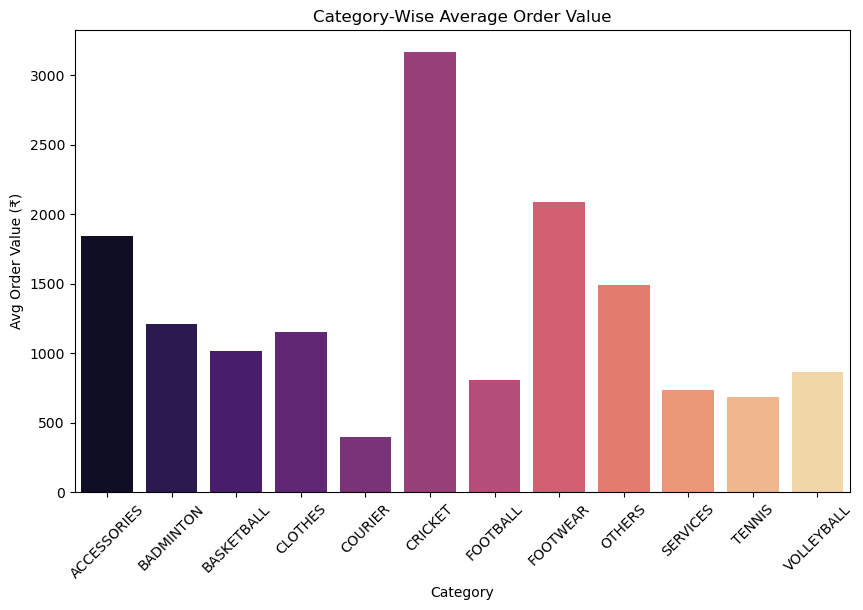

In [35]:
category_aos = df.groupby('Category').agg(
    Avg_Order_Value=('Total','mean'),
    Avg_Order_Qty=('Qty','mean')
).reset_index()

print("Category-Wise Average Order Size:")
display(category_aos)

plt.figure(figsize=(10,6))
sns.barplot(data=category_aos, x='Category', y='Avg_Order_Value', palette="magma")
plt.title("Category-Wise Average Order Value")
plt.ylabel("Avg Order Value (₹)")
plt.xticks(rotation=45)
plt.show()


In [36]:
# Categorywise total revenue and total units
category_asp = (
    df.groupby("Category")
      .agg(Total_Revenue=("Total", "sum"),
           Total_Qty=("Qty", "sum"))
      .reset_index()
)

# Calculate ASP
category_asp["Avg_Selling_Price"] = category_asp["Total_Revenue"] / category_asp["Total_Qty"]

# soryting
category_asp = category_asp.sort_values("Avg_Selling_Price", ascending=False)

print(category_asp)


       Category  Total_Revenue  Total_Qty  Avg_Selling_Price
5       CRICKET     2700327.10     1212.0        2227.992657
7      FOOTWEAR      507038.02      261.0        1942.674406
0   ACCESSORIES       51575.30       28.0        1841.975000
2    BASKETBALL        7098.60        7.0        1014.085714
3       CLOTHES      590116.00      590.0        1000.196610
11   VOLLEYBALL        1726.00        2.0         863.000000
8        OTHERS      689154.88      813.0         847.668979
6      FOOTBALL       14575.70       18.0         809.761111
9      SERVICES       71925.44      120.0         599.378667
4       COURIER         400.00        1.0         400.000000
10       TENNIS       52760.30      179.0         294.750279
1     BADMINTON      113890.30      433.0         263.026097


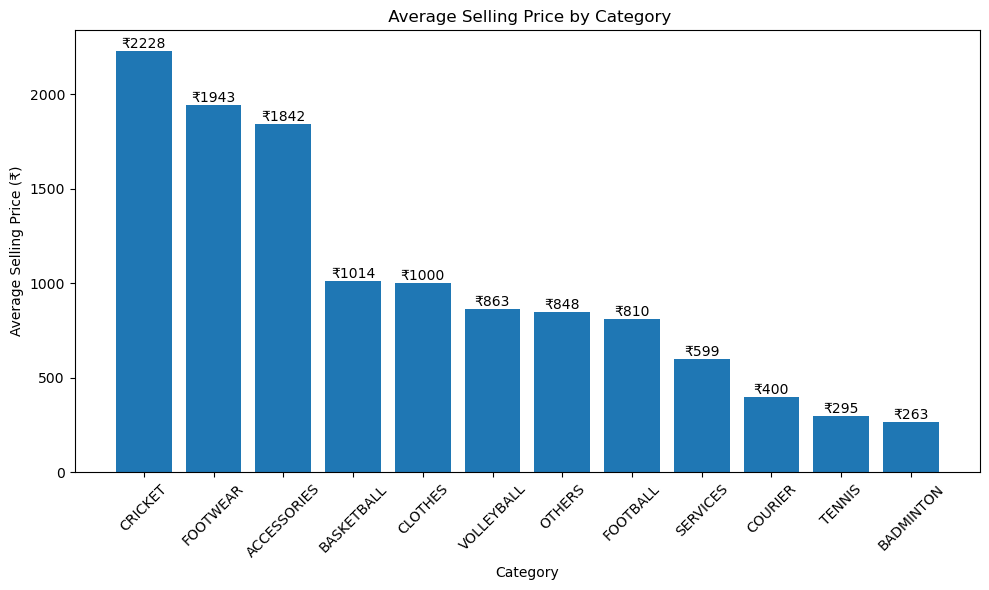

In [37]:
plt.figure(figsize=(10,6))
bars = plt.bar(category_asp["Category"], category_asp["Avg_Selling_Price"])
plt.xticks(rotation=45)
plt.title(" Average Selling Price by Category")
plt.xlabel("Category")
plt.ylabel("Average Selling Price (₹)")


for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"₹{yval:.0f}", ha="center", va="bottom")

plt.tight_layout()
plt.show()

# CUSTOMER ANALYTICS

In [38]:
# Unique customers
unique_customers = df["Contact Name"].nunique()
print(f"Total Unique Customers: {unique_customers}")

# Customerwise summary
customer_summary = (
    df.groupby("Contact Name")
      .agg(Total_Orders=("Invoice Date", "count"),
           Total_Quantity=("Qty", "sum"),
           Total_Revenue=("Total", "sum"))
      .reset_index()
)

print(customer_summary.head())


Total Unique Customers: 622
       Contact Name  Total_Orders  Total_Quantity  Total_Revenue
0      APCOINFRATEC             1             3.0         256.50
1  Aakarshan Shukla             1             1.0          90.25
2           Aakash              1             1.0        1236.75
3            Aalok              1             2.0        1848.00
4         Aalok Ji              1             1.0        1600.49


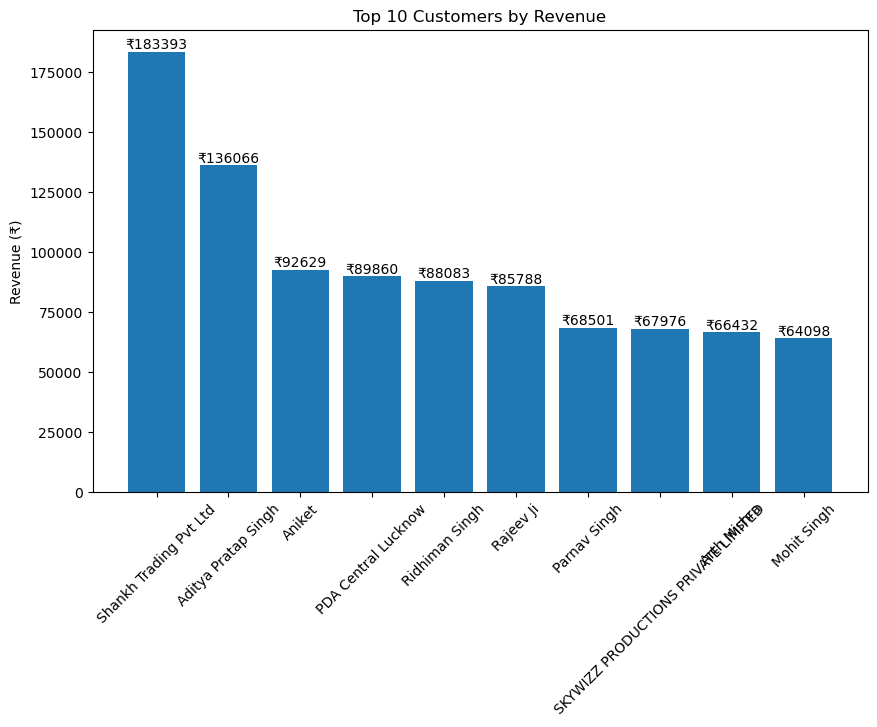

In [39]:
# Top 10 customers by revenue
top_customers_revenue = customer_summary.sort_values("Total_Revenue", ascending=False).head(10)


import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
bars = plt.bar(top_customers_revenue["Contact Name"], top_customers_revenue["Total_Revenue"])
plt.xticks(rotation=45)
plt.title("Top 10 Customers by Revenue")
plt.ylabel("Revenue (₹)")

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"₹{yval:.0f}", ha="center", va="bottom")

plt.show()


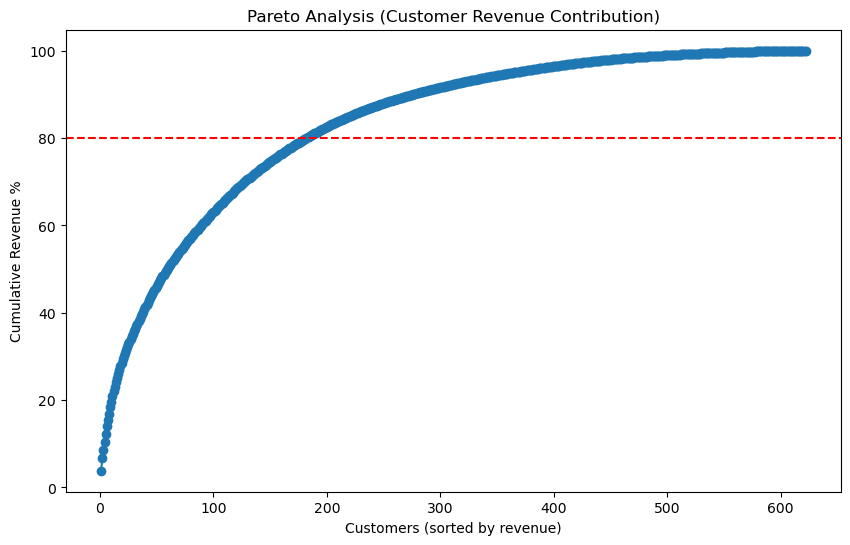

In [45]:
customer_clv = customer_clv.sort_values("Total_Revenue", ascending=False)
customer_clv["Cumulative_Revenue"] = customer_clv["Total_Revenue"].cumsum()
customer_clv["Revenue_%"] = 100 * customer_clv["Cumulative_Revenue"] / customer_clv["Total_Revenue"].sum()

plt.figure(figsize=(10,6))
plt.plot(range(1, len(customer_clv)+1), customer_clv["Revenue_%"], marker="o")
plt.axhline(80, color="red", linestyle="--")
plt.title("Pareto Analysis (Customer Revenue Contribution)")
plt.xlabel("Customers (sorted by revenue)")
plt.ylabel("Cumulative Revenue %")
plt.show()


       Contact Name Last_Purchase  Days_Since_Last  Churned
0      APCOINFRATEC    2024-12-09               31    False
1  Aakarshan Shukla    2024-09-02              129     True
2           Aakash     2024-11-10               60    False
3            Aalok     2024-12-30               10    False
4         Aalok Ji     2024-11-30               40    False


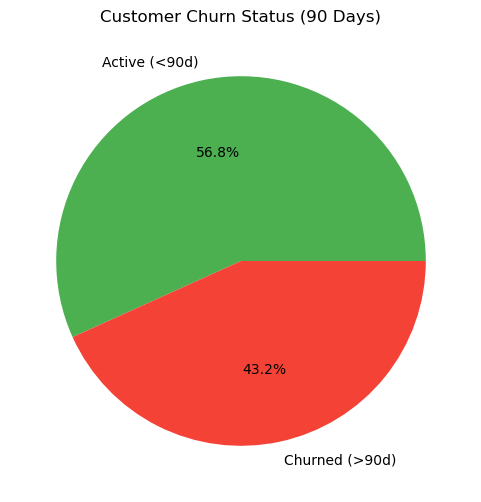

In [46]:
# Last purchase date for each customer
last_purchase = df.groupby("Contact Name")["Invoice Date"].max().reset_index()
last_purchase.columns = ["Contact Name", "Last_Purchase"]

#last date inthe dataset (JAN IT IS??)
snapshot_date = df["Invoice Date"].max()

# Days since last purchase
last_purchase["Days_Since_Last"] = (snapshot_date - last_purchase["Last_Purchase"]).dt.days

# Churn flag forninety days
last_purchase["Churned"] = last_purchase["Days_Since_Last"] > 90

print(last_purchase.head())


churn_counts = last_purchase["Churned"].value_counts()

plt.figure(figsize=(6,6))
plt.pie(churn_counts, labels=["Active (<90d)", "Churned (>90d)"], autopct="%1.1f%%", colors=["red","green"])
plt.title("Customer Churn Status (90 Days)")
plt.show()


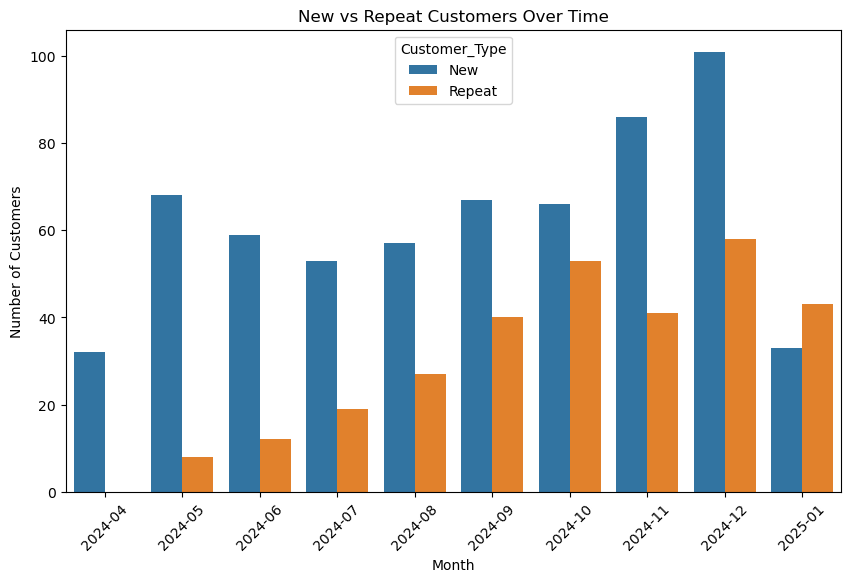

In [47]:
# Monthly customer activity
df["Month"] = df["Invoice Date"].dt.to_period("M")

# First month of each customer
first_purchase = df.groupby("Contact Name")["Invoice Date"].min().dt.to_period("M")
df = df.join(first_purchase, on="Contact Name", rsuffix="_First")

df["Customer_Type"] = df.apply(lambda x: "New" if x["Month"]==x["Invoice Date_First"] else "Repeat", axis=1)

# Count per month
customer_trend = df.groupby(["Month","Customer_Type"])["Contact Name"].nunique().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x="Month", y="Contact Name", hue="Customer_Type", data=customer_trend)
plt.xticks(rotation=45)
plt.title("New vs Repeat Customers Over Time")
plt.ylabel("Number of Customers")
plt.show()


Total Customers: 622
Active Customers: 353
Churned Customers: 269
Overall Churn Rate: 43.25%


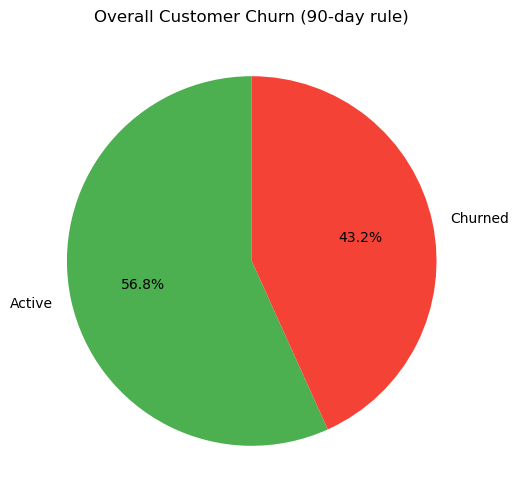

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure datetime
df["Invoice Date"] = pd.to_datetime(df["Invoice Date"], dayfirst=True)

# Latest date in dataset
snapshot_date = df["Invoice Date"].max()

# Last purchase per customer
last_purchase = df.groupby("Contact Name")["Invoice Date"].max().reset_index()
last_purchase["Days_Since_Last_Purchase"] = (snapshot_date - last_purchase["Invoice Date"]).dt.days

# ninety days for churn 
last_purchase["Status"] = last_purchase["Days_Since_Last_Purchase"].apply(
    lambda x: "Churned" if x > 90 else "Active"
)

# Summary counts
churn_summary = last_purchase["Status"].value_counts()
total_customers = len(last_purchase)
churned_customers = (last_purchase["Status"]=="Churned").sum()
active_customers = (last_purchase["Status"]=="Active").sum()
churn_rate = churned_customers / total_customers * 100

print(f"Total Customers: {total_customers}")
print(f"Active Customers: {active_customers}")
print(f"Churned Customers: {churned_customers}")
print(f"Overall Churn Rate: {churn_rate:.2f}%")


plt.figure(figsize=(6,6))
plt.pie(churn_summary, labels=churn_summary.index, autopct="%1.1f%%", startangle=90, colors=["#4CAF50","#F44336"])
plt.title("Overall Customer Churn (90-day rule)")
plt.show()


# PRODUCT LEVEL ANALYSIS

In [55]:


# Group by Product Name and sum revenue
product_revenue = df.groupby("Product Name")["Total"].sum().reset_index()

# Get Top 10 products
top10_products = product_revenue.sort_values("Total", ascending=False).head(10)

# Calculate revenue share %
top10_products["Revenue Share %"] = (top10_products["Total"] / top10_products["Total"].sum()) * 100



# Display numeric table too
print("\n Top 10 Products by Revenue Share:\n")
print(top10_products[["Product Name", "Total", "Revenue Share %"]])



📊 Top 10 Products by Revenue Share:

                                  Product Name      Total  Revenue Share %
268                      DSC E/W BAT SPLIT 111  101778.60        15.635560
198      CRICKET BAT SG SUNNY TONNY ICON BLACK   80996.64        12.442968
197            CRICKET BAT SG SUNNY TONNY ICON   78996.05        12.135630
186               CRICKET BAT SG PLAYER XTREME   68599.22        10.538436
187              CRICKET BAT SG PLAYERS XTREME   65487.36        10.060381
143  CAP RANGER - PREMIUM WHITE- WITH PRINTING   63000.00         9.678265
182         CRICKET BAT SG HP 33 (WITH SENSOR)   52199.42         8.019045
834         SS VINTAGE FINISHER ONE EW CR. BAT   48240.00         7.410786
205       CRICKET BAT SG TRIPLE CROWN ORIGINAL   45965.52         7.061373
797           SS SMACKER SIGNATURE E.W CR BATS   45680.30         7.017556


# CROSS SALES AND INVENTORY ANALYSIS

In [82]:


sales_df = pd.read_excel(r"sales final data.xlsx")
inventory_df = pd.read_excel(r"inventory_with_category.xlsx")


print(sales_df.head())
print(inventory_df.head())


   Invoice No Invoice Date   Contact Name  \
0         5.0   2024-04-07  Chandan Singh   
1         5.0   2024-04-07  Chandan Singh   
2        14.0   2024-04-11    Dhruv Gupta   
3        14.0   2024-04-11    Dhruv Gupta   
4         9.0   2024-04-13    Arth Mishra   

                                      Product Name  Brand   Category  Qty  \
0                              MASTER KW NO.04 BAT     KW    Cricket  1.0   
1                        BALL - SS GUSTY SYNTHETIC     SS    Cricket  1.0   
2                           PANAMA HAT WHITE SMALL  OTHER     Others  1.0   
3  YONEX TECH - 501B SYNTHETIC BADMINTON OVER GRIP  Yonex  Badminton  1.0   
4                            DSC E/W BAT CON DRIVE    DSC    Cricket  1.0   

       Rate    Disc.  Disc %     Tax  Tax %    Total  
0   2100.00      567    27.0  183.96   15.0  1716.96  
1    270.00     72.9    27.0   23.65   12.0   220.75  
2    401.79    80.36    20.0   38.57   12.0   360.00  
3     83.93        0     0.0   10.07   12.0   

In [83]:
# Aggregate revenue at product level
product_revenue = sales_df.groupby('Product Name')['Total'].sum().reset_index()

# Merge with inventory
top_products = product_revenue.sort_values(by='Total', ascending=False).head(10)
top_products = top_products.merge(
    inventory_df[['Name','Standardized_Quantity','Recalculated_Stock_Value']],
    left_on='Product Name',
    right_on='Name',
    how='left'
)

top_products = top_products[['Product Name','Total','Standardized_Quantity','Recalculated_Stock_Value']]
print(top_products)



                                Product Name      Total  \
0                      DSC E/W BAT SPLIT 111  101778.60   
1      CRICKET BAT SG SUNNY TONNY ICON BLACK   80996.64   
2            CRICKET BAT SG SUNNY TONNY ICON   78996.05   
3               CRICKET BAT SG PLAYER XTREME   68599.22   
4              CRICKET BAT SG PLAYERS XTREME   65487.36   
5  CAP RANGER - PREMIUM WHITE- WITH PRINTING   63000.00   
6         CRICKET BAT SG HP 33 (WITH SENSOR)   52199.42   
7         SS VINTAGE FINISHER ONE EW CR. BAT   48240.00   
8       CRICKET BAT SG TRIPLE CROWN ORIGINAL   45965.52   
9           SS SMACKER SIGNATURE E.W CR BATS   45680.30   

   Standardized_Quantity  Recalculated_Stock_Value  
0                    1.0                   13199.0  
1                    0.0                       0.0  
2                    2.0                   39998.0  
3                    NaN                       NaN  
4                    2.0                   39998.0  
5                    NaN        

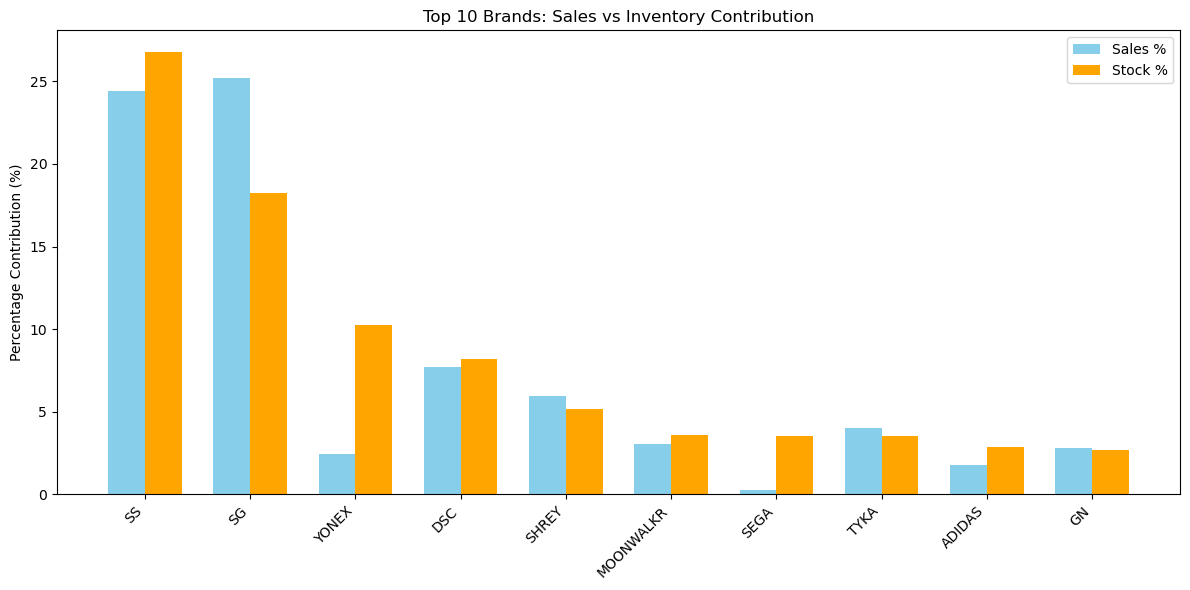

In [87]:
# Top 10 brands by stock value
top10_brands = brand_analysis.sort_values('Brand_Stock_Value', ascending=False).head(10)

brands = top10_brands['Brand']
sales_pct = top10_brands['Sales_Percent']
stock_pct = top10_brands['Stock_Percent']

x = np.arange(len(brands))
width = 0.35

plt.figure(figsize=(12,6))
plt.bar(x - width/2, sales_pct, width, label='Sales %', color='skyblue')
plt.bar(x + width/2, stock_pct, width, label='Stock %', color='orange')

plt.xticks(x, brands, rotation=45, ha='right')
plt.ylabel("Percentage Contribution (%)")
plt.title("Top 10 Brands: Sales vs Inventory Contribution")
plt.legend()
plt.tight_layout()
plt.show()


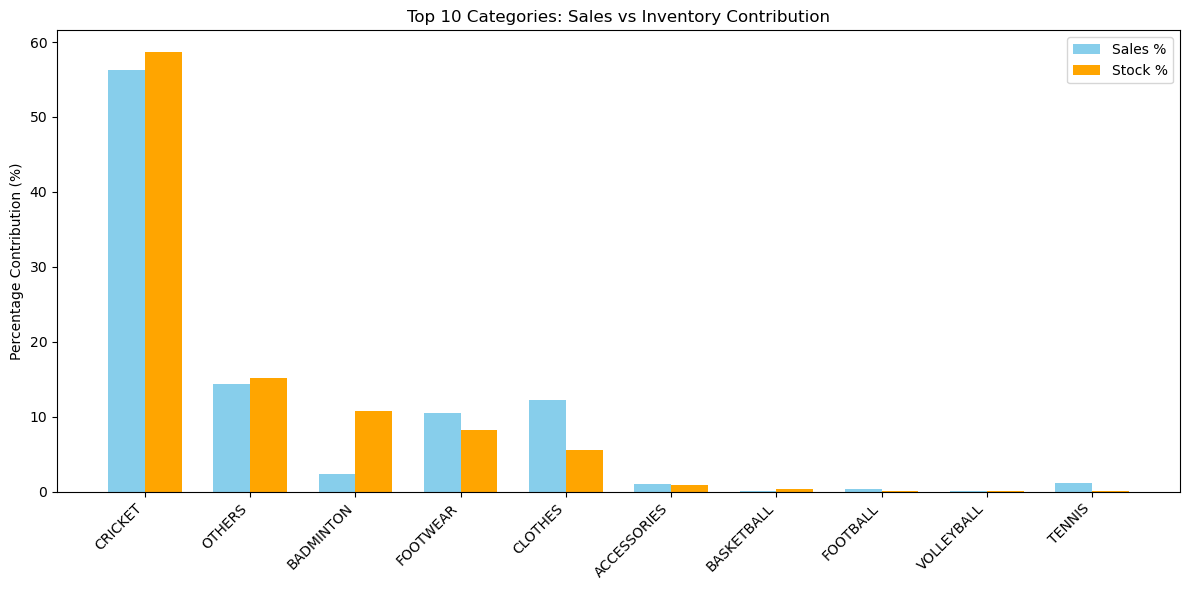

In [89]:
# Top 10 categories by stock value
top10_categories = category_analysis.sort_values('Category_Stock_Value', ascending=False).head(10)

categories = top10_categories['Category']
sales_pct = top10_categories['Sales_Percent']
stock_pct = top10_categories['Stock_Percent']

x = np.arange(len(categories))
width = 0.35

plt.figure(figsize=(12,6))
plt.bar(x - width/2, sales_pct, width, label='Sales %', color='skyblue')
plt.bar(x + width/2, stock_pct, width, label='Stock %', color='orange')

plt.xticks(x, categories, rotation=45, ha='right')
plt.ylabel("Percentage Contribution (%)")
plt.title("Top 10 Categories: Sales vs Inventory Contribution")
plt.legend()
plt.tight_layout()
plt.show()
